# Load packages

In [1]:
# Load packages
import pandas as pd
import numpy as np


# import nltk library
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# define stopwords and add custom stopword if needed
Stopwords=stopwords.words('english')
customlistwords2exlude = []
Stopwords.extend(customlistwords2exlude)

# Load Data and EDA

In [4]:
# load train daset
ads_ds=pd.read_csv("train.csv")
print("Shape for dataset", ads_ds.shape)
ads_ds.head(3)

Shape for dataset (1157, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
# load test dataset
ads_ds_test = pd.read_csv("test.csv")
ads_ds_test.head(3)

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."


In [6]:
# Duplication in comments
print("Number of unique comment -", len(ads_ds.COMMENT_ID.unique())/len(ads_ds.COMMENT_ID))

Number of unique comment - 0.9991356957649092


In [7]:
# 1 Duplicate record found which same information so removed it from dataset
comment_count = ads_ds.COMMENT_ID.value_counts()
comment_count[comment_count>1]
ads_ds[ads_ds.COMMENT_ID=="LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s"]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
853,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,janez novak,NaN,share and like this page to win a hand signed ...,1
854,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,janez novak,NaN,share and like this page to win a hand signed ...,1


In [8]:
# drop duplicate row
ads_ds=ads_ds.drop_duplicates()
print("Shape for dataset", ads_ds.shape)
ads_ds.head(2)

Shape for dataset (1156, 5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1


In [9]:
# Plot monthly 
ix = ads_ds.COMMENT_ID.isin(ads_ds_test.COMMENT_ID)
print("Overlap came comment ID in train and test - ", sum(ix))
ads_ds[ix]

Overlap came comment ID in train and test -  2


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
867,LneaDw26bFuH6iFsSrjlJLJIX3qD4R8-emuZ-aGUj0o,Amir bassem,NaN,if u love rihanna subscribe me,1
1064,_2viQ_Qnc68fX3dYsfYuM-m4ELMJvxOQBmBOFHqGOk0,tyler sleetway,2013-10-05T00:57:25.078000,so beutiful,0


In [43]:
# plot Authors greater 3


Index(['M.E.S', 'Shadrach Grentz', 'Hidden Love', '5000palo', 'Louis Bryant',
       'DanteBTV', 'Jacob Johnson', 'ThirdDegr3e', 'James Cook', 'Derek Moya',
       ...
       'Michael J. Cabose', 'Deepty Awasthy', 'Robert Petrea',
       'BIANCA FLORENTINA MANTA', 'Victoria Morales',
       'Fernando Luis Vega martinez', 'Ishfaq khan', 'Dana Matich',
       'just a filthy kafir', 'faith jones'],
      dtype='object', length=1094)

# Data preprocessing and EDA

<AxesSubplot:>

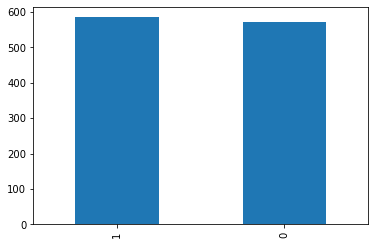

In [10]:
# NOTE: balanced class dataset 
ads_ds["CLASS"].value_counts().plot.bar()

In [11]:
# pre-process dataset
def preprocess_text(X):
    ''' Function to pre-process dataset
    '''
    Punctuations = string.punctuation
    for i in range(X.shape[0]):
        Tokenize = nltk.tokenize.WhitespaceTokenizer()
        Tokenized_comment =  Tokenize.tokenize(X[i])
        Lemmmatized_comment = nltk.stem.WordNetLemmatizer()
        stemm = PorterStemmer()
        updated_comment = ""        
        for word in Tokenized_comment:
            if word not in Stopwords and word not in Punctuations:
                word=word.lower()
                updated_comment = updated_comment + " " + word
        X[i]=updated_comment
    return X
                
# create preprocessed train
xtrain = preprocess_text(np.array(ads_ds["CONTENT"]))
ytrain = np.array(ads_ds["CLASS"])

# prepare test data
xtest = preprocess_text(np.array(ads_ds_test["CONTENT"]))
idtest = np.array(ads_ds_test["ID"])

# Feature Engineering

In [12]:
# vectorize
def vectorize(xtrain, xtest, mode="CountVectorizer"):
    ''' Function to create features
    '''
    if mode=="CountVectorizer":
        feature=CountVectorizer()
    else:
        feature=TfidfVectorizer()
    xtrainFeatures = feature.fit_transform(xtrain)
    xtestFeatures = feature.transform(xtest)
    return xtrainFeatures.toarray(),  xtestFeatures.toarray(), feature


xtrainfeat, xtestfeat, feature = vectorize(xtrain, xtest)
print("Number of features in train- ", xtrainfeat.shape)
print("Number of features in test - ", xtestfeat.shape)

Number of features in train-  (1156, 3162)
Number of features in test -  (799, 3162)


In [13]:
xtrain[0]

' huh, anyway check you[tube] channel: kobyoshi02'

In [14]:
feature.get_feature_names()

['00',
 '000',
 '002',
 '018',
 '02',
 '034',
 '04',
 '047000',
 '05',
 '053012',
 '08',
 '09',
 '0d878a889c',
 '0laviqu2b',
 '10',
 '100',
 '10000000',
 '100007085325116',
 '10001',
 '100877300245414',
 '10200253113705769',
 '104999962146104962510',
 '10626048',
 '1073741828',
 '1073741830',
 '1073741943',
 '109',
 '11',
 '111719098841907',
 '12',
 '123',
 '124',
 '126',
 '128gb',
 '13',
 '1337',
 '134470083389909',
 '14',
 '1442646731',
 '1495323920744243',
 '1496241863981208',
 '1496273723978022',
 '1498561870415874',
 '14gkvdo',
 '15',
 '16',
 '161620527267482',
 '16gb',
 '17',
 '1727483389',
 '17yr',
 '18',
 '19',
 '19255',
 '1990',
 '19924',
 '1b',
 '1bi',
 '1billion',
 '1firo',
 '1hmvtx',
 '1k',
 '1m',
 '1m00s',
 '20',
 '200',
 '2004',
 '2009',
 '200k',
 '200mm',
 '2010',
 '2011',
 '2012',
 '2012430',
 '2012bitches',
 '2013',
 '2014',
 '201470069872822',
 '2015',
 '2017',
 '210',
 '2177367',
 '229508',
 '23',
 '23active',
 '23everydayimvaping',
 '23giraffebruuh',
 '23kinglotheda

In [15]:
def regex_feature(xtrain):
    regxFeatures = [] 
    for i in range(xtrain.shape[0]):
        xtrain[i]
    

# Modelling Pipeline 

In [16]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from hyperopt import tpe
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [17]:
def calROC(clf, x, y):
    pred = clf.predict_proba(x)[:,1]
    score = roc_auc_score(y, pred)
    return score

In [18]:
# select feature with coverage
ix=xtrainfeat.sum(axis=0)>xtrainfeat.shape[0]*0.01
print("Number of features selected :", sum(ix))
xtrainfeat=xtrainfeat[:,ix]
xtestfeat=xtestfeat[:, ix]

Number of features selected : 199


In [19]:
# Find optimal parameter for models
model_score={}

# Random Forest
rf_clf = RandomForestClassifier()
rf_param = {'n_estimators':[25, 50, 100], 'max_features':['sqrt', 'log2']}
rf_clf=GridSearchCV(rf_clf, rf_param, cv=5)
rf_clf = rf_clf.fit(xtrainfeat,ytrain )
model_score["rf"]= rf_clf.best_score_
print("Random Forest Test AUC - ", model_score["rf"])
print("Random Forest Overall AUC - ", calROC(rf_clf.best_estimator_, xtrainfeat,ytrain))
print("Random best param - ", rf_clf.best_params_)

Random Forest Test AUC -  0.9238916256157637
Random Forest Overall AUC -  0.9983085604801891
Random best param -  {'max_features': 'sqrt', 'n_estimators': 50}


In [21]:
# Gradient Boosting
gbm_clf = GradientBoostingClassifier()
gbm_param = {'n_estimators':[200, 250, 300],'max_depth':[2, 3, 4], 'subsample':[0.8]}
gbm_clf=GridSearchCV(gbm_clf, gbm_param, cv=5)
gbm_clf = gbm_clf.fit(xtrainfeat,ytrain)
model_score["gbm"]= gbm_clf.best_score_
print("Gradient Boosting Test AUC - ", model_score["gbm"])
print("Gradient Boosting Overall AUC - ", calROC(gbm_clf.best_estimator_, xtrainfeat,ytrain))
print("Gradient Boosting - ", gbm_clf.best_params_)

Gradient Boosting Test AUC -  0.92132407822063
Gradient Boosting Overall AUC -  0.9968491325759276
Gradient Boosting -  {'max_depth': 4, 'n_estimators': 250, 'subsample': 0.8}


In [23]:
gbm_clf.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__ccp_alpha', 'estimator__criterion', 'estimator__init', 'estimator__learning_rate', 'estimator__loss', 'estimator__max_depth', 'estimator__max_features', 'estimator__max_leaf_nodes', 'estimator__min_impurity_decrease', 'estimator__min_impurity_split', 'estimator__min_samples_leaf', 'estimator__min_samples_split', 'estimator__min_weight_fraction_leaf', 'estimator__n_estimators', 'estimator__n_iter_no_change', 'estimator__random_state', 'estimator__subsample', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [24]:
# overall ensemble
rf_pred = rf_clf.best_estimator_.predict_proba(xtrainfeat)[:,1]
gbm_pred = gbm_clf.best_estimator_.predict_proba(xtrainfeat)[:,1]
pred_train = (rf_pred+gbm_pred)/2
print("Ensemble overall auc : ", roc_auc_score(ytrain, pred_train))

Ensemble overall auc :  0.9984522579969165


# Submission

In [27]:
rf_pred = rf_clf.best_estimator_.predict_proba(xtestfeat)[:,1]
gbm_pred = gbm_clf.best_estimator_.predict_proba(xtestfeat)[:,1]

pred = (rf_pred + gbm_pred)/2
sub = []
for ids, val in zip(idtest, pred):
    sub.append([ids, val])
sub = pd.DataFrame(sub)
sub.columns = ["ID", "prob"]
sub.head(5)

,ID,prob
0,0,0.989982
1,1,0.881586
2,2,0.974604
3,3,0.079330
4,4,0.993025


In [30]:
sub['CLASS']=[0 if val<0.5 else 1 for val in sub['prob']]
sub.head()

,ID,prob,CLASS
0,0,0.989982,1
1,1,0.881586,1
2,2,0.974604,1
3,3,0.079330,0
4,4,0.993025,1


In [29]:
sub.to_csv("Ranvijay_sub_rf_gbm.csv", index=False)